# Intro

The task in hand is to correctly identify the digits in the given pictures of handwritten digits. Handwritten digit recognition is one of the oldest problem in computer vision and often used to benchmark classification algorithms. In this notebook, I will create a simple ANN architecture using TensorFlow and train and test its accuracy.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
import tensorflow_datasets as tfds
import tensorflow_hub as hub

In [3]:
print(tf.__version__)

2.1.0


# Getting Dataset

MNIST dataset will be used to train and test the model. The dataset can be downloaded using the tensorflow-datasets package

In [5]:
dataset, metadata = tfds.load('mnist',
                             batch_size=64,
                             shuffle_files=True,
                             as_supervised=True,
                             with_info=True,
                             data_dir="tf_dataset",
                             download=True)

train_dataset, test_dataset = dataset['train'], dataset['test']

local data directory. If you'd instead prefer to read directly from our public
GCS bucket (recommended if you're running on GCP), you can instead pass
`try_gcs=True` to `tfds.load` or set `data_dir=gs://tfds-data/datasets`.





Dataset mnist downloaded and prepared to tf_dataset\mnist\3.0.1. Subsequent calls will reuse this data.


# Preprocessing

The images are 28x28 pixel grayscale images. The pixel values range from 0 to 255. For the ANN algorithm to perform efficiently, the features need to be normalized so that the pixel values range from 0 to 1

In [6]:
def normalize(images, labels):
    images = tf.cast(images, tf.float32)
    images /= 255
    return images, labels

In [7]:
train_dataset = train_dataset.map(normalize)
test_dataset = test_dataset.map(normalize)

In [8]:
# Caching in memory for faster training
train_dataset = train_dataset.cache()
test_dataset = test_dataset.cache()

# Plotting some examples

Let's look at some example images first so that we know what we are working with.

In [9]:
# Defining a function for plotting images
def display_image(img, label, ax=None):
    if ax is None:
        fig, ax = plt.subplots()
        
    img = img.numpy().squeeze()
    label = label.numpy()
    
    ax.imshow(img, cmap='gray')
    ax.set_title(str(label))
    ax.tick_params(axis='both', length=0)
    ax.set_xticklabels('')
    ax.set_yticklabels('')
    
    return ax

In [10]:
# Getting some example images and corresponding labels
image, label = next(iter(train_dataset))

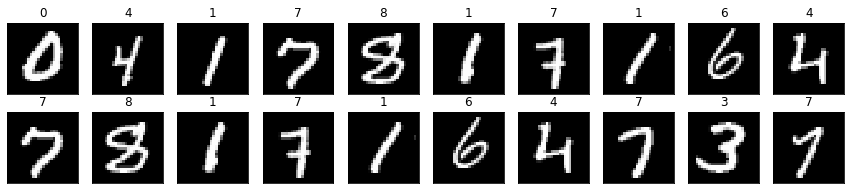

In [11]:
# Plotting 20 random examples
row = 2
column = 10
fig, ax = plt.subplots(row,column, figsize=(15,3))
for i in range(row):
    for j in range(column):
        display_image(image[3*i+j], label[3*i+j], ax = ax[i,j])

# Creating Model

The model architecture below contains one input layer, two hidden layer and one output layer. The MNIST dataset images are 28x28 pixels. So the first hidden layer will have 28x28 = 784 input features. And the output layer will have 10 output features as the images have 10 classes (0 to 9). ReLU activation function is used for the hidden layers and Softmax activation function is used for the output layer.

In [12]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
    tf.keras.layers.Dense(256, activation=tf.nn.relu),
    tf.keras.layers.Dense(64, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [13]:
optimizer = tf.keras.optimizers.Adam(lr=0.01)
model.compile(optimizer=optimizer,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

# Training

The model will be trained for 5 epoch. As it is a very simple model, it can be trained easily in CPU.

In [14]:
model.fit(train_dataset, epochs=5)

Epoch 1/5
938/938 [==============================] - 10s 11ms/step - loss: 0.2345 - accuracy: 0.9295
Epoch 2/5
938/938 [==============================] - 4s 4ms/step - loss: 0.1361 - accuracy: 0.9613
Epoch 3/5
938/938 [==============================] - 3s 4ms/step - loss: 0.1143 - accuracy: 0.9675
Epoch 4/5
938/938 [==============================] - 4s 4ms/step - loss: 0.1090 - accuracy: 0.9699
Epoch 5/5
938/938 [==============================] - 3s 4ms/step - loss: 0.0963 - accuracy: 0.9741


In [15]:
# testing
test_loss, test_accuracy = model.evaluate(test_dataset)
print('Accuracy on test dataset:', test_accuracy)

    157/Unknown - 2s 10ms/step - loss: 0.1388 - accuracy: 0.9656Accuracy on test dataset: 0.9656
